In [4]:
import crofton_method as cfm
import pandas as pd
reload(cfm)
%pylab inline
plt.style.use('ggplot')

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.edgecolor'] = '#555555'
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['text.usetex'] = False

Populating the interactive namespace from numpy and matplotlib


Making conceptual figures for the parasite mortality manuscript

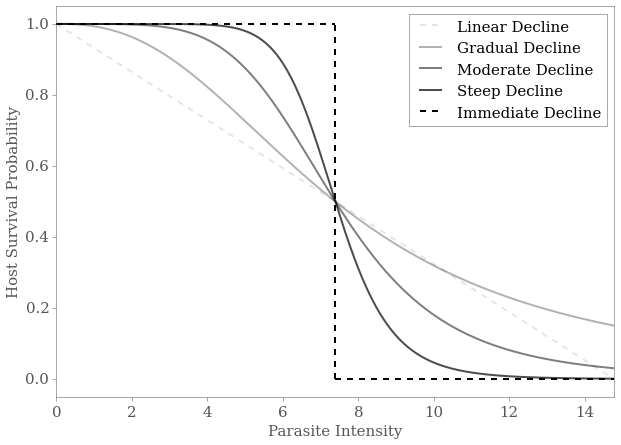

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

vals = np.linspace(0, np.exp(5 / 2.5) / 0.5, 10000)
alphas = [0.1]


ax.plot(vals, 1 + -0.5 / np.exp(5 / 2.5) * vals, '--', lw=2, color='black', alpha=0.1, label="Linear Decline")

ax.plot(vals, cfm.surv_prob(vals, 5, -2.5), color="black", alpha=0.3, linestyle="-", linewidth=2, 
                    label="Gradual Decline")

ax.plot(vals, cfm.surv_prob(vals, 10, -5), color="black", alpha=0.5, linestyle="-", linewidth=2,
                    label="Moderate Decline")

ax.plot(vals, cfm.surv_prob(vals, 20, -10), color="black", alpha=0.7, linestyle="-", linewidth=2,
                    label="Steep Decline")


# #plot(log(vals), cfm.surv_prob(vals, 1.25, -.625))
# ax.plot(vals, cfm.surv_prob(vals, 30, -15), color="black", linestyle="-", linewidth=1, 
#                     label="a = 5, b = -2.5")
# ax.plot(vals, cfm.surv_prob(vals, 10, -5), color="black", linestyle=":", linewidth=1,
#                     label="a = 10, b = -5")
# ax.plot(vals, cfm.surv_prob(vals, 20, -10), color="black", linestyle="-.", linewidth=1,
#                     label="a = 20, b = -10")
# #ax.plot(vals, cfm.surv_prob(vals, 80, -40), color="black", linestyle="-.", linewidth=2)
# ax.plot(vals, 1 + -0.5 / np.exp(5 / 2.5) * vals, '--', color='grey')
ax.hlines(1, 0, np.exp(5 / 2.5), linestyle='--', lw=2, color='black')
ax.vlines(np.exp(5 / 2.5), 0, 1, linestyle="--", lw=2, color='black')
ax.hlines(0, np.exp(5 / 2.5), np.exp(5 / 2.5) / 0.5, lw=2, linestyle='--', color='black', label="Immediate Decline")
ax.set_ylim(-0.05, 1.05)
ax.set_xlim(0, np.exp(5 / 2.5) / 0.5)
ax.set_xlabel("Parasite Intensity", size=15)
ax.set_ylabel("Host Survival Probability", size=15)
ax.legend(prop={'size' : 15})
ax.tick_params(axis='both', which='major', labelsize=15)

fig.savefig("../results/conceptual_fig.pdf", dpi=300)

## Run comparison to Crofton Data and make plots

In [6]:
run compare_crofton_methods.py

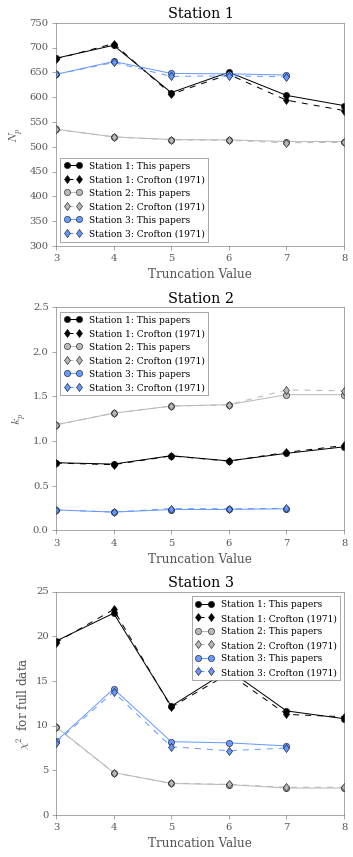

In [14]:
# Plot the results of the Crofton Method
plt.rcParams['axes.color_cycle'] = ['black', 'black', '#B8B8B8', '#B8B8B8', "#6699FF", "#6699FF"]
fig, axes = plt.subplots(3, 1, figsize=(5, 12))
for ax in axes:
    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()
    ax.set_xlabel("Truncation Value")
    
axes[0].plot(np.arange(3, 9), our_st1_N, '-o', label="Station 1: This papers")
axes[0].plot(np.arange(3, 9), crof_st1_N, '--d', label="Station 1: Crofton (1971)")
axes[0].plot(np.arange(3, 9), our_st2_N, '-o', label="Station 2: This papers")
axes[0].plot(np.arange(3, 9), crof_st2_N, '--d', label="Station 2: Crofton (1971)")
axes[0].plot(np.arange(3, 8), our_st3_N, '-o', label="Station 3: This papers")
axes[0].plot(np.arange(3, 8), crof_st3_N, '--d', label="Station 3: Crofton (1971)")

axes[0].set_ylabel(r"$N_p$")
axes[0].set_ylim((300, 750))
axes[0].legend(loc="best", prop={"size":9})
axes[0].set_title("Station 1")

axes[1].plot(np.arange(3, 9), our_st1_ks, '-o', label="Station 1: This papers")
axes[1].plot(np.arange(3, 9), crof_st1_ks, '--d', label="Station 1: Crofton (1971)")
axes[1].plot(np.arange(3, 9), our_st2_ks, '-o', label="Station 2: This papers")
axes[1].plot(np.arange(3, 9), crof_st2_ks, '--d', label="Station 2: Crofton (1971)")
axes[1].plot(np.arange(3, 8), our_st3_ks, '-o', label="Station 3: This papers")
axes[1].plot(np.arange(3, 8), crof_st3_ks, '--d', label="Station 3: Crofton (1971)")

axes[1].set_ylabel(r"$k_p$")
axes[1].set_ylim((0, 2.5))
axes[1].legend(loc="best", prop={"size":9})
axes[1].set_title("Station 2")

axes[2].plot(np.arange(3, 9), zip(*crof_st1_compare_ss)[1], '-o', label="Station 1: This papers")
axes[2].plot(np.arange(3, 9), zip(*crof_st1_compare_ss)[0], '--d', label="Station 1: Crofton (1971)")
axes[2].plot(np.arange(3, 9), zip(*crof_st2_compare_ss)[1], '-o', label="Station 2: This papers")
axes[2].plot(np.arange(3, 9), zip(*crof_st2_compare_ss)[0], '--d', label="Station 2: Crofton (1971)")
axes[2].plot(np.arange(3, 8), zip(*crof_st3_compare_ss)[1], '-o', label="Station 3: This papers")
axes[2].plot(np.arange(3, 8), zip(*crof_st3_compare_ss)[0], '--d', label="Station 3: Crofton (1971)")

axes[2].set_ylabel(r"$\chi^2$ for full data")
#axes[2].set_ylim((0, 2))
axes[2].legend(loc="best", prop={"size":9})
axes[2].set_title("Station 3")

plt.tight_layout()
fig.savefig("../results/compare_crofton.pdf", dpi=300)

### Figure for PIHM

In [51]:
reload(cfm)
alive, init, td = cfm.get_alive_and_dead(1000, 2, -1, 1, 10)

rands = np.random.rand(len(alive))
surv = rands > 0.3
alive2 = alive[surv]

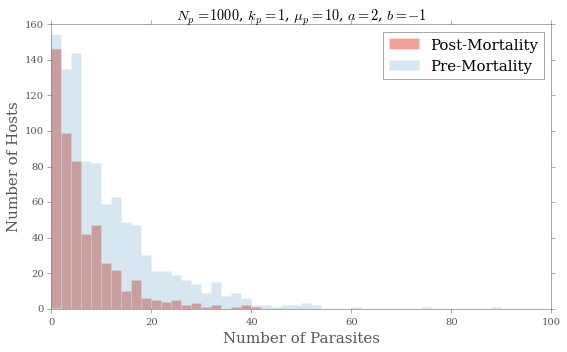

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
bins = np.arange(0, 102, 2)
ax.hist(alive, alpha=0.5, bins=bins, label="Post-Mortality")
ax.hist(init, alpha=0.2, bins=bins, label="Pre-Mortality")
#ax.hist(alive2, alpha=0.3, bins=bins, label="Post-Mortality, Random Death")
ax.legend(prop={'size' : 15})
ax.set_xlabel("Number of Parasites", size=15)
ax.set_ylabel("Number of Hosts", size=15)
ax.set_title(r"$N_p = 1000$, $k_p = 1$, $\mu_p = 10$, $a = 2$, $b = -1$")

plt.tight_layout()
plt.savefig("../results/pre_post_linear.pdf", dpi=300)

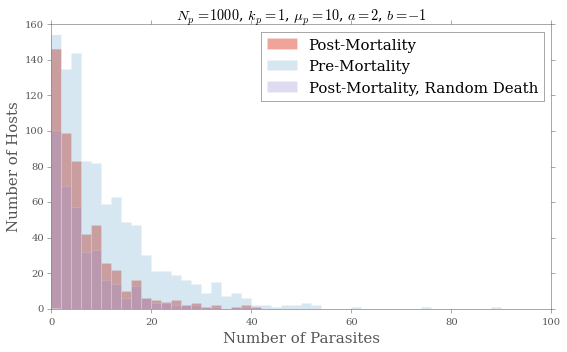

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
bins = np.arange(0, 102, 2)
ax.hist(alive, alpha=0.5, bins=bins, label="Post-Mortality")
ax.hist(init, alpha=0.2, bins=bins, label="Pre-Mortality")
ax.hist(alive2, alpha=0.3, bins=bins, label="Post-Mortality, Random Death")
ax.legend(prop={'size' : 15})
ax.set_xlabel("Number of Parasites", size=15)
ax.set_ylabel("Number of Hosts", size=15)
ax.set_title(r"$N_p = 1000$, $k_p = 1$, $\mu_p = 10$, $a = 2$, $b = -1$")

plt.tight_layout()
plt.savefig("../results/pre_post_linear_random.pdf", dpi=300)